In [2]:
import sys
import os.path
import pylab as plt
from zedstat import zedstat 
import pandas as pd
plt.style.use('fivethirtyeight')
from jupyterthemes import jtplot
jtplot.style()

#

In [6]:
F=.43
F=.60
surv_rate=0.90 # .30 to .73 95% cf
surv_rate_lb=0.90 # .30 to .73 95% cf
surv_rate_ub=0.95 # .30 to .73 95% cf


In [39]:
prev_vet=0.00317
prev_pub=0.00135
prev_si=0.048
prev_lower_bnd=0.06
#data='/home/ishanu/Dropbox/ZED/Research/CDMRPgrants/TBI/data/CURVES/SISA/National_ROC_CURVE_Female.csv'
data='/home/ishanu/Dropbox/ZED/Research/CDMRPgrants/TBI/data/CURVES/SISA/National_ROC_CURVE_Male.csv'
data='/home/ishanu/Dropbox/ZED/Research/CDMRPgrants/TBI/data/CURVES/SISA/National_ROC_CURVE_Female.csv'
#data='/home/ishanu/Dropbox/ZED/Research/CDMRPgrants/TBI/data/CURVES/PTSD/National_ROC_CURVE_Male.csv'
#data='/home/ishanu/Dropbox/ZED/Research/CDMRPgrants/TBI/data/CURVES/PTSD/National_ROC_CURVE_Female.csv'
#data='/home/ishanu/Dropbox/ZED/Research/CDMRPgrants/TBI/data/CURVES/SISA_NOPSY/National_ROC_CURVE_Female.csv'
#data='/home/ishanu/Dropbox/ZED/Research/CDMRPgrants/TBI/data/CURVES/SISA_NOPSY/National_ROC_CURVE_Male.csv'
zt=zedstat.processRoc(df=pd.read_csv(data),
           order=3, 
           total_samples=1.7*1e6,
           positive_samples=15800,
           alpha=0.01,
           prevalence=prev_lower_bnd)

In [40]:
# compute smoothened roc and other performance measures
zt.smooth(STEP=0.001)
zt.allmeasures(interpolate=True)
zt.usample(precision=3)
zt.getBounds()

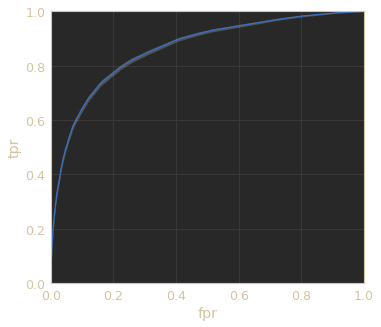

In [41]:
plt.figure(figsize=[5,5])
ax=plt.gca()
ax=zt.get().tpr.plot(ax=ax)
plt.fill_between(x=zt.get().index, y1=zt.df_lim['U'].tpr,y2=zt.df_lim['L'].tpr, color='w',alpha=.2)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_ylabel('tpr');

In [42]:
zt.auc()

(0.8627216035634744, 0.8682310816033634, 0.8572121255235855)

<AxesSubplot:xlabel='LR-'>

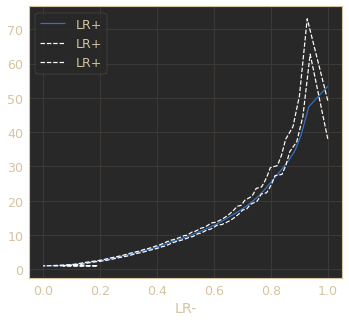

In [43]:
zf=zt.get()
zfu=zt.df_lim['U']
zfl=zt.df_lim['L']
plt.figure(figsize=[5,5])
ax=plt.gca()
ax=zf.plot(ax=ax,x='LR-',y='LR+')
zfu.plot(ax=ax,x='LR-',y='LR+',style='--w')
zfl.plot(ax=ax,x='LR-',y='LR+',style='--w')
#ax.set_xlim(0.01,.98)
#ax.set_ylim(0,1)
#ax.set_ylabel('tpr');

In [44]:
ZU=zf+(zfu-zfl)/2
ZL=zf-(zfu-zfl)/2
Z=zf.join(ZU,rsuffix='_upper').join(ZL,rsuffix='_lower')
#ax=Z.plot(x='LR-',y='LR+')
#ax=Z.plot(ax=ax,x='LR-U',y='LR+U')
#ax=Z.plot(ax=ax,x='LR-L',y='LR+L')


In [45]:
Z

,tpr,ppv,acc,npv,LR+,LR-,threshold,tpr_upper,ppv_upper,acc_upper,...,LR+_upper,LR-_upper,threshold_upper,tpr_lower,ppv_lower,acc_lower,npv_lower,LR+_lower,LR-_lower,threshold_lower
fpr,,,,,,,,,,,,,,,,,,,,,
0.000,0.000000,0.466545,0.940000,0.940000,53.371754,1.000000,2.000000,0.000000,0.478729,0.940000,...,58.964287,1.000000,2.000000,0.000000,0.454361,0.940000,0.940000,47.779222,1.000000,2.000000
0.001,0.067929,0.465717,0.942681,0.943769,47.438959,0.933449,0.040863,0.073085,0.477321,0.942991,...,52.595279,0.928287,0.040863,0.062772,0.454113,0.942372,0.943476,42.282640,0.938610,0.040863
0.002,0.095212,0.465172,0.943403,0.945274,39.355087,0.907012,0.034887,0.101226,0.476968,0.943764,...,42.362388,0.900985,0.034887,0.089197,0.453377,0.943042,0.944931,36.347786,0.913038,0.034887
0.003,0.118226,0.464622,0.943857,0.946542,34.580285,0.884816,0.031423,0.124842,0.476031,0.944254,...,36.785759,0.878179,0.031423,0.111609,0.453212,0.943460,0.946162,32.374811,0.891452,0.031423
0.004,0.144302,0.463917,0.944236,0.947982,31.392428,0.859710,0.028550,0.151503,0.474464,0.944668,...,33.192646,0.852480,0.028550,0.137101,0.453370,0.943804,0.947567,29.592210,0.866939,0.028550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.996,0.999805,0.000000,0.063731,1.006055,1.003935,0.005165,0.003287,1.000091,0.000016,0.063748,...,1.004223,-0.055056,0.003287,0.999518,-0.000016,0.063714,1.001513,1.003648,0.065385,0.003287
0.997,0.999853,0.000000,0.062798,1.006325,1.002951,0.003874,0.003287,1.000102,0.000014,0.062813,...,1.003200,-0.061886,0.003287,0.999605,-0.000014,0.062783,1.001080,1.002703,0.069633,0.003287
0.998,0.999902,0.000000,0.061866,1.006595,1.001968,0.002582,0.003287,1.000105,0.000011,0.061878,...,1.002171,-0.072469,0.003287,0.999700,-0.000011,0.061853,1.000171,1.001765,0.077634,0.003287


In [46]:
Z.to_csv(data.replace('.csv','X.csv'))

In [47]:
zt.get()

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.000,0.000000,0.466545,0.940000,0.940000,53.371754,1.000000,2.000000
0.001,0.067929,0.465717,0.942681,0.943769,47.438959,0.933449,0.040863
0.002,0.095212,0.465172,0.943403,0.945274,39.355087,0.907012,0.034887
0.003,0.118226,0.464622,0.943857,0.946542,34.580285,0.884816,0.031423
0.004,0.144302,0.463917,0.944236,0.947982,31.392428,0.859710,0.028550
...,...,...,...,...,...,...,...
0.996,0.999805,0.000000,0.063731,1.006055,1.003935,0.005165,0.003287
0.997,0.999853,0.000000,0.062798,1.006325,1.002951,0.003874,0.003287
0.998,0.999902,0.000000,0.061866,1.006595,1.001968,0.002582,0.003287


In [49]:
zt.operating_zone(LRminus=.99,LRplus=6)
#display(zt._operating_zone)
rf0,txt0,resdf0=zt.interpret(fpr=zt._operating_zone.fpr.values[0],number_of_positives=1000,
                      five_yr_survival=surv_rate,factor=F)

rf0,txt0lb,resdf0lb=zt.interpret(fpr=zt._operating_zone.fpr.values[0],number_of_positives=1000,
                      five_yr_survival=surv_rate_lb,factor=F)

rf0,txt0ub,resdf0ub=zt.interpret(fpr=zt._operating_zone.fpr.values[0],number_of_positives=1000,
                      five_yr_survival=surv_rate_ub,factor=F)


rf1,txt1,resdf1=zt.interpret(fpr=zt._operating_zone.fpr.values[1],number_of_positives=1000,
                      five_yr_survival=surv_rate,factor=F)
rf1,txt1,resdf1ub=zt.interpret(fpr=zt._operating_zone.fpr.values[1],number_of_positives=1000,
                      five_yr_survival=surv_rate_ub,factor=F)
rf1,txt1,resdf1lb=zt.interpret(fpr=zt._operating_zone.fpr.values[1],number_of_positives=1000,
                      five_yr_survival=surv_rate_lb,factor=F)
print('high precision operation:\n','\n '.join(txt0))
print('\n')
print('high recall operation:\n','\n '.join(txt1))
zop=zt._operating_zone
zop['NNS'] = [resdf0ub.T.NNS.values[0],resdf1ub.T.NNS.values[0]]
display(zop)

display(resdf0lb)
display(resdf0)
display(resdf0ub)
display(resdf1)
display(resdf1lb)
display(resdf1ub)


high precision operation:
 For every 1000 positive instances
 we raise 786 flags,
 out of which 359 are true positives
 428 are false alarms
 641 cases are missed
 Number needed to screen is 37


high recall operation:
 For every 1000 positive instances
 we raise 1490 flags,
 out of which 607 are true positives
 884 are false alarms
 393 cases are missed
 Number needed to screen is 41


,fpr,tpr,ppv,acc,npv,LR+,LR-,threshold,NNS
high precision,0.001,0.067929,0.465717,0.942681,0.943769,47.438959,0.933449,0.040863,74.0
high sensitivity,0.110,0.659985,0.405076,0.876165,0.976208,6.038603,0.381842,0.005905,82.0


,estimates
POS,1000.00
TP,359.00
FP,428.00
NEG,15667.00
FLAGS,786.00
FN,641.00
TN,15239.00
NNS,37.00
flagged_fraction,0.05


,estimates
POS,1000.00
TP,359.00
FP,428.00
NEG,15667.00
FLAGS,786.00
FN,641.00
TN,15239.00
NNS,37.00
flagged_fraction,0.05


,estimates
POS,1000.00
TP,359.00
FP,428.00
NEG,15667.00
FLAGS,786.00
FN,641.00
TN,15239.00
NNS,74.00
flagged_fraction,0.05


,estimates
POS,1000.00
TP,607.00
FP,884.00
NEG,15667.00
FLAGS,1490.00
FN,393.00
TN,14783.00
NNS,41.00
flagged_fraction,0.09


,estimates
POS,1000.00
TP,607.00
FP,884.00
NEG,15667.00
FLAGS,1490.00
FN,393.00
TN,14783.00
NNS,41.00
flagged_fraction,0.09


,estimates
POS,1000.00
TP,607.00
FP,884.00
NEG,15667.00
FLAGS,1490.00
FN,393.00
TN,14783.00
NNS,82.00
flagged_fraction,0.09


## writing tables to latex

In [31]:
from zedstat.textable import textable
#textable(zt.get(),tabname='table.tex',FORMAT='%1.1f',TABFORMAT='L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}',LNTERM='\\\\\n')

In [32]:
#pd.options.display.html.use_mathjax = False
from zedstat.textable import tablewithbounds
xf=tablewithbounds(zt.get(),zt.usample(zt.df_lim['U']),zt.usample(zt.df_lim['L']))#.to_csv('table.csv')
xf.loc[zt._operating_zone.fpr.values]

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.001,$0.045 \pm 0.004$,$0.432 \pm 0.017$,$0.941 \pm 0.000$,$0.942 \pm 0.000$,$31.58 \pm 4.286$,$0.955 \pm 0.004$,0.053186
0.097,$0.585 \pm 0.010$,$0.381 \pm 0.003$,$0.883 \pm 0.000$,$0.971 \pm 0.000$,$6.026 \pm 0.104$,$0.459 \pm 0.011$,0.013528


In [33]:
from zedstat.textable import textable
textable(xf,tabname='tmp.tex',FORMAT='%1.3f',INDEX=True,LNTERM='\\\\\\hline\n')     

In [34]:
! cat tmp.tex


\begin{tabular}{L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}}\hline
fpr&tpr&ppv&acc&npv&LR+&LR-&threshold\\\hline
0.000& $0.0  \pm  0.0$ & $0.433  \pm  0.018$ & $0.94  \pm  0.0$ & $0.940  \pm  0.0$ & $31.81  \pm  3.275$ & $1.0  \pm  0.0$ &1.088\\\hline
0.001& $0.045  \pm  0.004$ & $0.432  \pm  0.017$ & $0.941  \pm  0.000$ & $0.942  \pm  0.000$ & $31.58  \pm  4.286$ & $0.955  \pm  0.004$ &0.053\\\hline
0.002& $0.066  \pm  0.005$ & $0.431  \pm  0.016$ & $0.941  \pm  0.000$ & $0.943  \pm  0.000$ & $27.08  \pm  2.551$ & $0.935  \pm  0.005$ &0.048\\\hline
0.003& $0.086  \pm  0.005$ & $0.431  \pm  0.015$ & $0.941  \pm  0.000$ & $0.944  \pm  0.000$ & $24.12  \pm  1.915$ & $0.917  \pm  0.005$ &0.044\\\hline
0.004& $0.096  \pm  0.006$ & $0.430  \pm  0.015$ & $0.941  \pm  0.000$ & $0.945  \pm  0.000$ & $22.73  \pm  1.511$ & $0.907  \pm  0.006$ &0.042\\\hline
0.005& $0.113  \pm  0.006$ & $0.430  \pm  0.013$ & $0.941  \pm  0.000$ & $0.946  \pm  0.000$ & $20.85  \pm  1.301$ & $0.891  \pm